## Part 6: Trends and Seasonality 

In this section of report, we will try to analyze trends, seasonality, periodicity, if any present in our data.

In [1]:
!pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib notebook
import pandas as pd
import pandas.plotting
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
%matplotlib inline

In [3]:
file_path = 'C:/Users/Omkar/Desktop/EE798Q/Open pit blasting 01-02-2023 000000 To 01-05-2023 235959.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path , index_col=0)

In [4]:
# Simplify column names
df.columns = ['from', 'to', 'PM10', 'PM2.5', 'NO','NO2','NOX','CO','SO2','NH3','Ozone','Benzene']
# deleting to column as we need only one timestamp column for to be index and we choose it to be from column
df = df.drop('to', axis=1)
# removing last 3 rows as they contaion max , min , avg data instead of actual observations
df = df.iloc[:-3]
df.tail()


,from,PM10,PM2.5,NO,NO2,NOX,CO,SO2,NH3,Ozone,Benzene
#,,,,,,,,,,,
8636,2023-05-01 22:45:00,19.0,11.0,17.9,100.0,67.8,0.63,10.0,10.7,26.1,0.1
8637,2023-05-01 23:00:00,19.0,11.0,17.9,100.0,67.7,0.57,10.0,10.4,30.9,0.1
8638,2023-05-01 23:15:00,19.0,11.0,19.6,100.2,69.2,0.58,9.9,10.5,29.6,0.1
8639,2023-05-01 23:30:00,19.0,11.0,20.8,100.2,70.2,0.58,9.5,10.8,30.0,0.1
8640,2023-05-01 23:45:00,32.0,6.0,21.8,98.8,70.3,NaN,NaN,11.0,33.5,0.1


In [5]:
# conveting timestamp as a string object into a datetime numerical 
date_format = '%Y-%m-%d %H:%M:%S'

# Convert the 'from' column to numerical datetime representation
df['from'] = pd.to_datetime(df['from'], format=date_format)


In [6]:
# set datetime "from" column as an index column
df.set_index('from', inplace=True)
df.head()

,PM10,PM2.5,NO,NO2,NOX,CO,SO2,NH3,Ozone,Benzene
from,,,,,,,,,,
2023-02-01 00:00:00,95.0,35.0,NaN,90.1,56.2,0.31,NaN,17.7,28.1,0.4
2023-02-01 00:15:00,95.0,35.0,NaN,88.0,55.1,0.33,NaN,18.3,27.1,0.4
2023-02-01 00:30:00,95.0,35.0,NaN,87.7,55.2,0.38,NaN,19.7,24.9,0.4
2023-02-01 00:45:00,122.0,34.0,NaN,88.9,55.7,0.38,NaN,21.3,21.9,0.4
2023-02-01 01:00:00,122.0,34.0,NaN,90.0,55.8,0.38,NaN,22.3,16.7,0.4


In [7]:
df=df.copy()

In [8]:
df

,PM10,PM2.5,NO,NO2,NOX,CO,SO2,NH3,Ozone,Benzene
from,,,,,,,,,,
2023-02-01 00:00:00,95.0,35.0,NaN,90.1,56.2,0.31,NaN,17.7,28.1,0.4
2023-02-01 00:15:00,95.0,35.0,NaN,88.0,55.1,0.33,NaN,18.3,27.1,0.4
2023-02-01 00:30:00,95.0,35.0,NaN,87.7,55.2,0.38,NaN,19.7,24.9,0.4
2023-02-01 00:45:00,122.0,34.0,NaN,88.9,55.7,0.38,NaN,21.3,21.9,0.4
2023-02-01 01:00:00,122.0,34.0,NaN,90.0,55.8,0.38,NaN,22.3,16.7,0.4
...,...,...,...,...,...,...,...,...,...,...
2023-05-01 22:45:00,19.0,11.0,17.9,100.0,67.8,0.63,10.0,10.7,26.1,0.1
2023-05-01 23:00:00,19.0,11.0,17.9,100.0,67.7,0.57,10.0,10.4,30.9,0.1
2023-05-01 23:15:00,19.0,11.0,19.6,100.2,69.2,0.58,9.9,10.5,29.6,0.1


In [9]:
# resample
# df3 = df3.resample('D').mean()
# interpolating
PM10 = df['PM10']
df = df.interpolate(method='spline',order=3)
df.fillna(method='ffill', inplace=True)  # Fill missing values forward
df.fillna(method='bfill', inplace=True)  # Fill missing values backward

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8640 entries, 2023-02-01 00:00:00 to 2023-05-01 23:45:00
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PM10     8640 non-null   float64
 1   PM2.5    8640 non-null   float64
 2   NO       8640 non-null   float64
 3   NO2      8640 non-null   float64
 4   NOX      8640 non-null   float64
 5   CO       8640 non-null   float64
 6   SO2      8640 non-null   float64
 7   NH3      8640 non-null   float64
 8   Ozone    8640 non-null   float64
 9   Benzene  8640 non-null   float64
dtypes: float64(10)
memory usage: 742.5 KB


Just like before we will first form a new data column, "tot_pol"  which indicates overall effect of all pollution factors using weighted means.

For weights we will use formula,

weight= mean of a column/ sum of means of all columns

In [11]:
weights=[0.398,0.166,0.032,0.123,0.094,3,0.075,0.029,0.078,0.0004]
# Define the weights for each column

In [12]:
# Calculate the weighted mean across the columns
df['tot_pol'] = (df.iloc[:, :10] * weights).sum(axis=1)

In [13]:
df

,PM10,PM2.5,NO,NO2,NOX,CO,SO2,NH3,Ozone,Benzene,tot_pol
from,,,,,,,,,,,
2023-02-01 00:00:00,95.0,35.0,18.1,90.1,56.2,0.310000,8.200000,17.7,28.1,0.4,64.814560
2023-02-01 00:15:00,95.0,35.0,18.1,88.0,55.1,0.330000,8.200000,18.3,27.1,0.4,64.452260
2023-02-01 00:30:00,95.0,35.0,18.1,87.7,55.2,0.380000,8.200000,19.7,24.9,0.4,64.443760
2023-02-01 00:45:00,122.0,34.0,18.1,88.9,55.7,0.380000,8.200000,21.3,21.9,0.4,75.030760
2023-02-01 01:00:00,122.0,34.0,18.1,90.0,55.8,0.380000,8.200000,22.3,16.7,0.4,74.798860
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01 22:45:00,19.0,11.0,17.9,100.0,67.8,0.630000,10.000000,10.7,26.1,0.1,33.620140
2023-05-01 23:00:00,19.0,11.0,17.9,100.0,67.7,0.570000,10.000000,10.4,30.9,0.1,33.796440
2023-05-01 23:15:00,19.0,11.0,19.6,100.2,69.2,0.580000,9.900000,10.5,29.6,0.1,33.940440


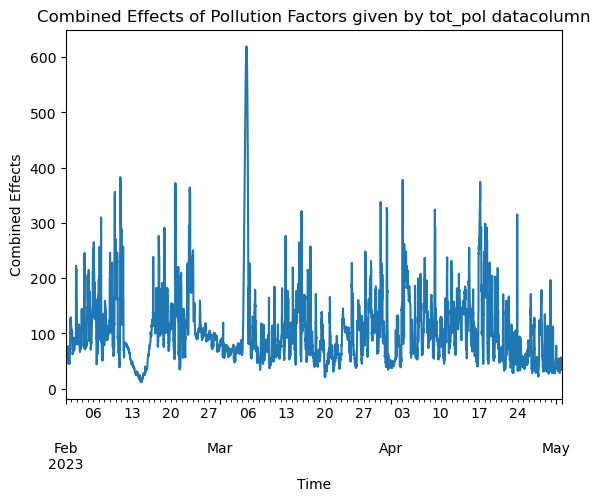

In [14]:
df['tot_pol'].plot()
plt.xlabel('Time')
plt.ylabel('Combined Effects')
plt.title('Combined Effects of Pollution Factors given by tot_pol datacolumn')
plt.show()

Checking for stationarity in the new column data.

In [15]:
 from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df['tot_pol'])
print(f'p-value: {adf_test[1]}')

p-value: 5.741498169692062e-13


Such a low p-value implies that tot_pol(combined effective data) also follows time-series stationarity.

In [16]:
# df = df.resample('D').mean()

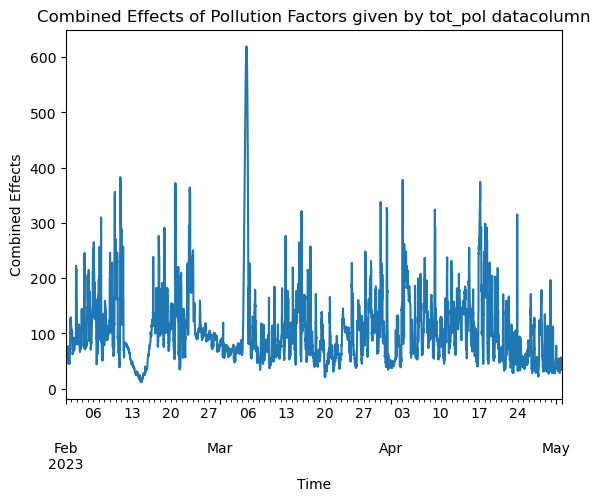

In [17]:
df['tot_pol'].plot()
plt.xlabel('Time')
plt.ylabel('Combined Effects')
plt.title('Combined Effects of Pollution Factors given by tot_pol datacolumn')
plt.show()

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Resample the data to daily frequency
# df = df.resample('D').mean()
decomposition = seasonal_decompose(df['tot_pol'], model='additive', period=900)


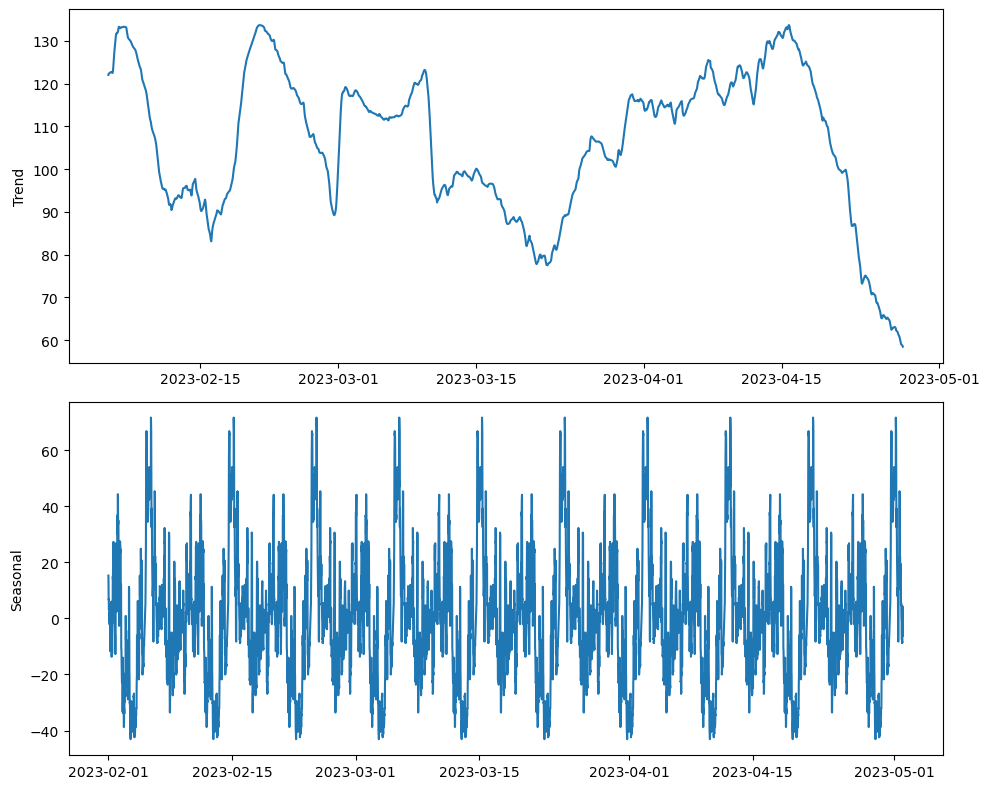

In [20]:
%matplotlib inline
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
ax[0].plot(decomposition.trend)
ax[0].set_ylabel('Trend')
ax[1].plot(decomposition.seasonal)
ax[1].set_ylabel('Seasonal')
# ax[2].plot(decomposition.resid)
# ax[2].set_ylabel('Residual')
# ax[3].plot(decomposition.observed)
# ax[3].set_ylabel('Observed')
plt.tight_layout()
plt.show()


Above graph captures seasonality present in our data. We can see that the graph has seasonality of 9 days.(pattern repeats after 9 days accross all data).

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


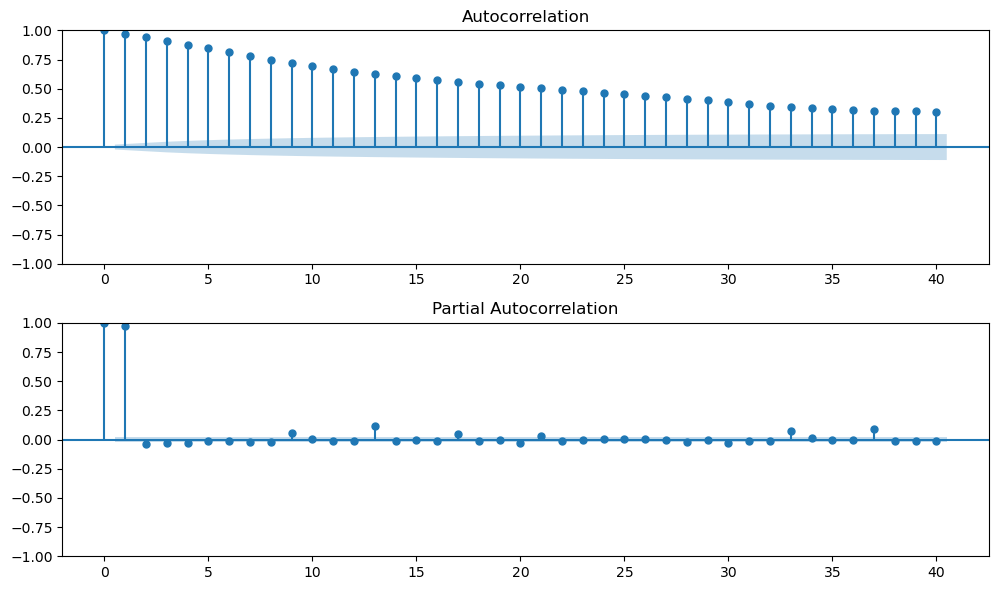

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, 1, figsize=(10, 6))
plot_acf(df['tot_pol'], ax=ax[0])
ax[0].set_title('Autocorrelation')
plot_pacf(df['tot_pol'], ax=ax[1])
ax[1].set_title('Partial Autocorrelation')
plt.tight_layout()
plt.show()


In [22]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


<Axes: xlabel='from'>

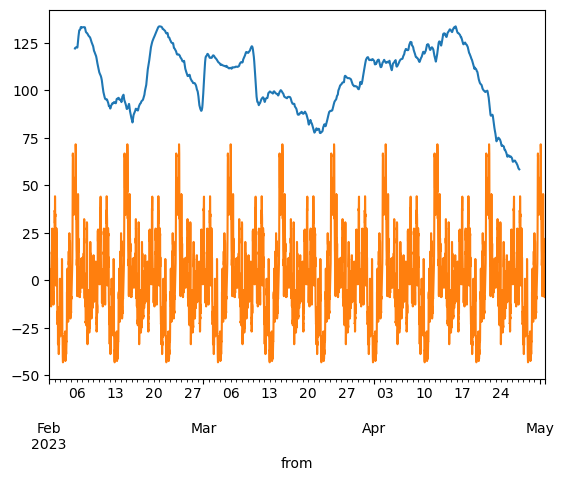

In [23]:
trend.plot()
seasonal.plot()